## HyDe: a Python Package for Genome-Scale Hybrid Detection



### 1. Simulation: Hybrid Speciation



In [1]:
%%bash

# Set the value of gamma, theta, and 
# the number of sites that you want
GAMMA=0.45
THETA=0.1
SITES=50000

# ms sims tree 1: (((p1,hyb),p2),out)
ms 16 $(echo "$SITES * $GAMMA" | bc) -T -I 4 5 5 5 1 \
    -ej 0.25 2 1 -ej 0.5 1 3 -ej 0.75 3 4 | grep '^(' > trees.tre

# ms sims tree 2: ((p1,(hyb,p2)),out)
ms 16 $(echo "$SITES * (1.0 - $GAMMA)" | bc) -T -I 4 5 5 5 1 \
    -ej 0.25 2 3 -ej 0.5 1 3 -ej 0.75 3 4 | grep '^(' >> trees.tre

#seq-gen sims using GTR+I+G
seq-gen -mGTR -s $THETA -l 1 -r 1.0 0.2 10.0 0.75 3.2 1.6 \
    -f 0.15 0.35 0.15 0.35 -i 0.2 -a 5.0 -g 3 -q < trees.tre > seqs.txt


# converting for HyDe..."
python seqgen2matrix.py seqs.txt data.txt map.txt

Now we will load the HyDe module, read in the data, and perform a hypothesis test using the estimated site patterns from our simulations.

```python
import phyde as hd

hd.HydeData?
```

In [13]:
import phyde as hd

In [14]:
data = hd.HydeData("data.txt", "map.txt", "out", 16, 4, 50000)
res1 = data.test_triple('sp1', 'sp2', 'sp3')
res2 = data.test_individuals('sp1', 'sp2', 'sp3')

Reading input file................Done.
Reading map file................Done.


In [15]:
res1

{'Gamma': 0.45940773681124786,
 'Pvalue': 2.220446049250313e-16,
 'Zscore': 8.179342426207114}

In [16]:
res, boot = hd.run_hyde("data.txt", "map.txt", "out", 16, 4, 50000, bootReps=100)

['sp1', 'sp2', 'sp3', '8.17934', '2.22045e-16', '0.459408', '4.49628e+06', '276715', '225120', '123045', '19495', '281770', '74176', '18539', '115706', '494397', '35557', '20129', '27837', '38993', '2246']
Number of boot reps: 100


In [17]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [19]:
%matplotlib inline

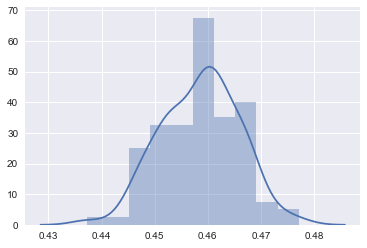

In [23]:
ax = sns.distplot(np.array(boot("Gamma", "sp1", "sp2", "sp3")))

### 2. Simulation: F1 Hybrid Individual



### 3. *Heliconius* Butterflies

